In [13]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import matplotlib.pyplot as plt

In [14]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def one_hot(label, num_classes=10):
    vec = np.zeros(num_classes)
    vec[label] = 1
    return vec

def sigmoid_derivative(a):
    return a * (1 - a)


In [15]:
    class NeuralNetwork:
        def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
            self.input_size = input_size
            self.hidden_size = hidden_size
            self.output_size = output_size
            self.lr = learning_rate
            self.initialize_parameters()
    
        def initialize_parameters(self):
            np.random.seed(42)
            limit1 = np.sqrt(6 / (self.input_size + self.hidden_size))
            self.w1 = np.random.uniform(-limit1, limit1, (self.hidden_size, self.input_size))
            limit2 = np.sqrt(6 / (self.hidden_size + self.hidden_size))
            self.w2 = np.random.uniform(-limit2, limit2, (self.hidden_size, self.hidden_size))
            limit3 = np.sqrt(6 / (self.hidden_size + self.output_size))
            self.w3 = np.random.uniform(-limit3, limit3, (self.output_size, self.hidden_size))
    
        def forward_pass(self, X):
            l1 = self.w1 @ X
            z1 = sigmoid(l1)
            l2 = self.w2 @ z1
            z2 = sigmoid(l2)
            l3 = self.w3 @ z2
            out = sigmoid(l3)
            return out, (z1, z2, out)
    
        def backward_pass(self, X, target, cache):
            z1, z2, out = cache
            target_one_hot = one_hot(target, self.output_size)
            delta3 = (out - target_one_hot) * sigmoid_derivative(out)
            self.w3 -= self.lr * np.outer(delta3, z2)
            delta2 = np.dot(self.w3.T, delta3) * sigmoid_derivative(z2)
            self.w2 -= self.lr * np.outer(delta2, z1)
            delta1 = np.dot(self.w2.T, delta2) * sigmoid_derivative(z1)
            self.w1 -= self.lr * np.outer(delta1, X)
    
        def predict(self, X):
            out, _ = self.forward_pass(X)
            return np.argmax(out)
    
        def train(self, X_train, y_train, epochs):
            for _ in tqdm(range(epochs)):
                for i in range(X_train.shape[0]):
                    idx = np.random.randint(0, X_train.shape[0])
                    X = X_train.iloc[idx].values
                    y = y_train.iloc[idx].values[0]
                    out, cache = self.forward_pass(X)
                    self.backward_pass(X, y, cache)
    
        def validate(self, X_test, y_test):
            predictions = [self.predict(X_test.iloc[i].values) for i in range(X_test.shape[0])]
            return accuracy_score(y_test, predictions)

In [16]:
digits = datasets.load_digits()
data = pd.DataFrame(digits.data)
target = pd.DataFrame(digits.target, columns=["target"])

In [17]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)


In [22]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
1734,0.0,0.0,3.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,...,11.0,0.0,0.0,0.0,3.0,11.0,16.0,13.0,4.0,0.0
855,0.0,0.0,9.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,16.0,14.0,3.0,0.0,0.0
1642,0.0,0.0,0.0,10.0,13.0,3.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,11.0,13.0,6.0,0.0,0.0
175,0.0,1.0,10.0,16.0,16.0,11.0,0.0,0.0,0.0,5.0,...,4.0,0.0,0.0,1.0,15.0,14.0,11.0,4.0,0.0,0.0
925,0.0,0.0,6.0,14.0,13.0,3.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,4.0,15.0,16.0,9.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.0,1.0,13.0,16.0,16.0,12.0,1.0,0.0,0.0,12.0,...,9.0,0.0,0.0,1.0,14.0,16.0,16.0,11.0,1.0,0.0
1294,0.0,3.0,15.0,16.0,15.0,3.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,3.0,16.0,5.0,0.0,0.0,0.0,0.0
860,0.0,0.0,9.0,16.0,16.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,14.0,16.0,16.0,2.0,0.0
1459,0.0,0.0,1.0,13.0,16.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,15.0,7.0,0.0,0.0,0.0


In [19]:
nn = NeuralNetwork(input_size=x_train.shape[1], hidden_size=128, output_size=10, learning_rate=0.01)
nn.train(x_train, y_train, epochs=20)

100%|██████████| 20/20 [00:10<00:00,  1.89it/s]


In [20]:
accuracy = nn.validate(x_test, y_test)
print(f"Validation Accuracy: {accuracy:.2f}")

Validation Accuracy: 0.97


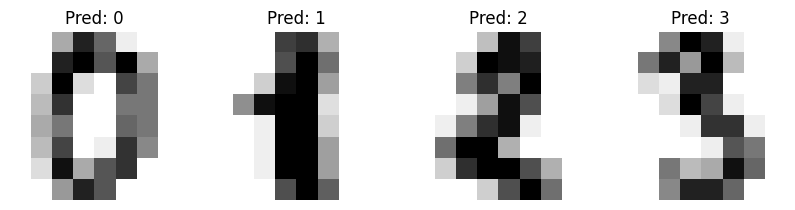

In [21]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images[:4], y_test.values[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    pred = nn.predict(image.flatten())
    ax.set_title(f"Pred: {pred}")
plt.show()